In [5]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [6]:
TRAIN_DIR = 'C:/Users/User/Downloads/Assignment/CIFAR-10-images-master/CIFAR-10-images-master/train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [7]:
class_num = CATEGORIES.index(c)
print(class_num)

9


In [8]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:02<00:00, 1961.07it/s]

50000


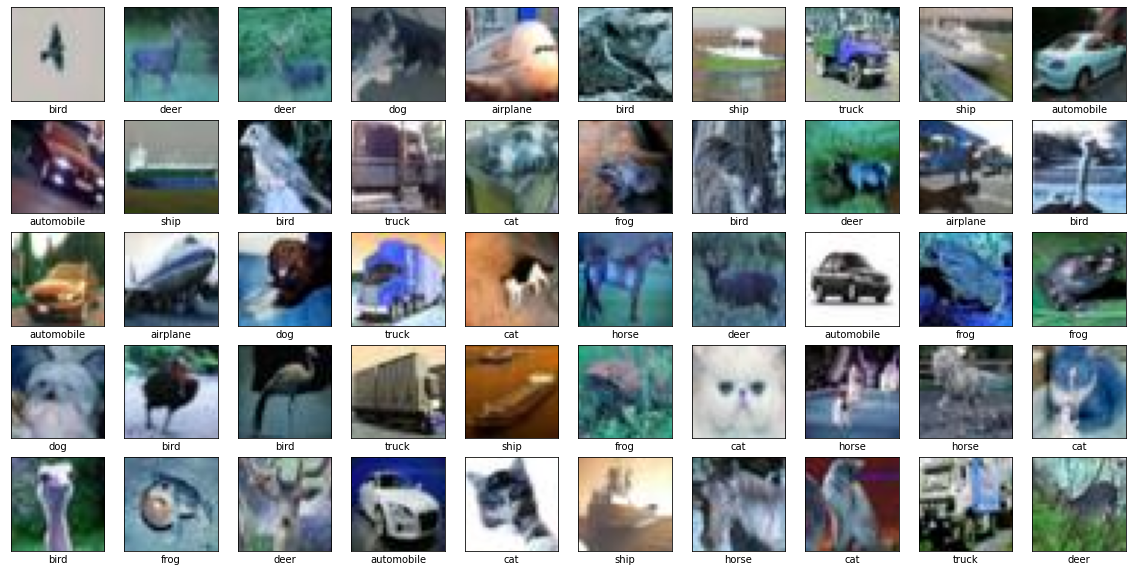

In [9]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [10]:
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

In [11]:
def accuracyCount(k,train,validation):
    acc1=0
    acc2=0
    for v in tqdm(validation):

        scores1 = []
        scores2 = []

        for t in train:
            l1_dist = np.sum(t[0]-v[0])
            scores1.append([l1_dist,t[1]])

            l2_dist = np.sum(np.sqrt(t[0]**2-v[0]**2))
            scores2.append([l2_dist,t[1]])


        sorted_scores1 = sorted(scores1, key=lambda a: a[0])
        sorted_scores2 = sorted(scores2, key=lambda a: a[0])

        top_k1 = [sorted_scores1[i][1] for i in range(k)]
        top_k2 = [sorted_scores2[i][1] for i in range(k)]

        pred_label1 = max(set(top_k1), key=top_k1.count)
        pred_label2 = max(set(top_k2), key=top_k2.count)


        true_label = v[1]
        if pred_label1 == true_label:
            acc1 += 1
        if pred_label2 == true_label:
            acc2 += 1
            
    return [acc1,acc2]
                

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:27<00:00,  2.23it/s]


Accuracy = 19.40% for L1, Accuracy = 11.60% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:22<00:00,  2.26it/s]


Accuracy = 18.20% for L1, Accuracy = 12.50% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:25<00:00,  2.24it/s]


Accuracy = 18.80% for L1, Accuracy = 12.40% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:19<00:00,  2.27it/s]


Accuracy = 19.20% for L1, Accuracy = 12.00% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:16<00:00,  2.29it/s]


Accuracy = 18.90% for L1, Accuracy = 12.80% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:14<00:00,  2.30it/s]


Accuracy = 17.00% for L1, Accuracy = 11.10% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:27<00:00,  2.23it/s]


Accuracy = 16.10% for L1, Accuracy = 10.20% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:08<00:00,  2.33it/s]


Accuracy = 17.50% for L1, Accuracy = 10.60% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:04<00:00,  2.35it/s]


Accuracy = 18.30% for L1, Accuracy = 12.30% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:13<00:00,  2.31it/s]


Accuracy = 18.00% for L1, Accuracy = 13.50% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:09<00:00,  2.33it/s]


Accuracy = 19.80% for L1, Accuracy = 11.30% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:14<00:00,  2.30it/s]


Accuracy = 19.80% for L1, Accuracy = 11.00% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:14<00:00,  2.67it/s]


Accuracy = 19.00% for L1, Accuracy = 10.40% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:58<00:00,  2.79it/s]


Accuracy = 19.80% for L1, Accuracy = 10.80% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:03<00:00,  2.75it/s]


Accuracy = 19.50% for L1, Accuracy = 11.90% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:59<00:00,  2.78it/s]


Accuracy = 20.20% for L1, Accuracy = 11.40% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:52<00:00,  2.84it/s]


Accuracy = 17.90% for L1, Accuracy = 10.10% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:54<00:00,  2.82it/s]


Accuracy = 19.30% for L1, Accuracy = 10.30% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:55<00:00,  2.82it/s]


Accuracy = 18.10% for L1, Accuracy = 11.70% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:58<00:00,  2.79it/s]


Accuracy = 18.10% for L1, Accuracy = 11.10% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:12<00:00,  2.69it/s]


Accuracy = 19.20% for L1, Accuracy = 12.10% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:58<00:00,  2.79it/s]


Accuracy = 19.00% for L1, Accuracy = 11.00% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:58<00:00,  2.79it/s]


Accuracy = 18.90% for L1, Accuracy = 10.90% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:48<00:00,  2.87it/s]


Accuracy = 19.20% for L1, Accuracy = 12.20% for L2


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:42<00:00,  2.92it/s]


Accuracy = 18.80% for L1, Accuracy = 11.80% for L2


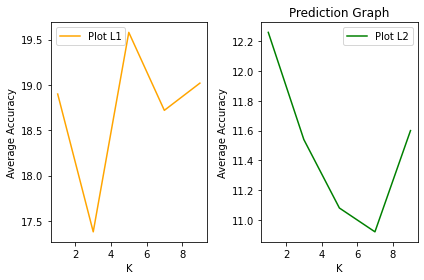

In [12]:
K=[1,3,5,7,9]

midPointAcc1=[]

midPointAcc2=[]


for i in range(5):
    total_acc1 = []
    total_acc2 = []
    
    if i==0:
        train = f1+f2+f3+f4
        validation = f0 
    elif i==1:
        train = f0+f2+f3+f4
        validation = f1
    elif i==2:
        train = f1+f0+f3+f4
        validation = f2
    elif i==3:
        train = f1+f2+f0+f4
        validation = f3
    elif i==4:
        train = f1+f2+f3+f0
        validation = f4
        

    for k in K:
        acc1,acc2=accuracyCount(k,train,validation)
        
        accuracy1 = acc1 / len(validation) * 100
        accuracy2 = acc2 / len(validation) * 100
        
        print(f"Accuracy = {accuracy1:.2f}% for L1, Accuracy = {accuracy2:.2f}% for L2")
        
        total_acc1.append(accuracy1)
        total_acc2.append(accuracy2)

    midPoint2 = sum(total_acc2)/5
    midPoint1 = sum(total_acc1)/5
    midPointAcc1.append(midPoint1)
    midPointAcc2.append(midPoint2)
    
    print("===========================================================")

fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)

ax1.plot(K,midPointAcc1,label='Plot L1',color='orange')
ax2.plot(K,midPointAcc2,label='Plot L2',color='green')

ax1.set_xlabel('K')
ax1.set_ylabel('Average Accuracy')
ax1.legend(loc='best')

ax2.set_xlabel('K')
ax2.set_ylabel('Average Accuracy')
ax2.legend(loc='best')

plt.title('Prediction Graph')

plt.tight_layout()

plt.show()
